# **Indepth Analysis of Box Office Films**

## Project Overview

This project conducts a **comprehensive analysis of the movie industry** by integrating multiple data sources including IMDb, Box Office data, TMDB, Rotten Tomatoes, and budget information. The goal is to uncover actionable insights that can guide strategic decision-making for stakeholders in the film industry, such as:

- **Production Companies**: Understanding which genres, budgets, and release strategies maximize profitability
- **Investors**: Identifying risk factors and high-return investment opportunities
- **Marketing Teams**: Recognizing patterns in audience ratings and box office performance
- **Content Creators**: Discovering trends in successful films across different markets

## Business Objectives

### Primary Objectives:

1. **Profitability Analysis**: Determine the relationship between production budgets and box office returns
2. **Market Comparison**: Analyze domestic vs. international market performance
3. **Studio Performance**: Evaluate which studios consistently deliver profitable films
4. **Genre Analysis**: Identify which movie genres perform best in terms of ratings and revenue
5. **Rating Impact**: Assess the correlation between audience ratings and financial success
6. **Temporal Trends**: Examine how the movie industry has evolved over time

### Key Questions:

- Is there a significant difference between domestic and foreign gross revenues?
- Do higher production budgets guarantee higher profits?
- Which studios are most profitable on average?
- What is the relationship between IMDb ratings and box office performance?
- How do different genres perform across various metrics?
- Are there temporal patterns in movie profitability and ratings?

---

## Data Sources

| Dataset | Source | Key Information |
|---------|--------|----------------|
| **movie_basics** | IMDb (SQLite) | Movie titles, genres, runtime, release year |
| **movie_ratings** | IMDb (SQLite) | User ratings and vote counts |
| **movie_gross** | Box Office Mojo | Domestic and foreign gross revenue |
| **tmdb** | The Movie Database | Popularity scores, vote averages, release dates |
| **movie_budgets** | The Numbers | Production budgets and worldwide gross |


---

## Methodology

The analysis follows a structured approach:

1. **Data Loading**: Import all datasets from various sources
2. **Data Cleaning**: Handle missing values, convert data types, standardize formats
3. **Feature Engineering**: Create derived metrics and normalize titles for merging
4. **Data Integration**: Merge datasets on common keys (titles, IDs)
5. **Exploratory Data Analysis (EDA)**: Visualize distributions and relationships
6. **Statistical Testing**: Conduct hypothesis tests to validate findings
7. **Insights & Recommendations**: Synthesize results into actionable insights

---

# 3. Data Understanding
For the analysis,we used data from the `zippedData` folder of [this repository.](https://github.com/learn-co-curriculum/dsc-phase-2-project-v3)

### Dataset Descriptions

1. **bom.movie_gross.csv**
   - **Description:** Contains financial information about movies.
   - **Columns:**
     - **Title:** The title of the film.
     - **Year of Production:** The year the movie was produced.
     - **Domestic Gross:** Total revenue generated within the domestic market.
     - **Foreign Gross:** Total revenue generated in the global market.
     - **studio** The company that produced the movie

2. **tmdb.movies.csv**
   - **Description:** Information about movies from The Movie Database (TMDb).
   - **Columns:**
     - **Genres_ids:** Identifiers for movie genres.
     - **Language:** The language in which the movie is made.
     - **Title:** The title of the movie.
     - **Popularity:** Popularity score of the movie.
     - **Average Vote Count:** Average number of votes the movie has received.
   

4. **tn.movie_budgets.csv**
   - **Description:** Contains financial details about movies.
   - **Columns:**
     - **Budget:** The production budget of the movie.
     - **Domestic Gross:** Revenue generated in the domestic market.
     - **Worldwide Gross:** Total revenue generated worldwide.
     

5. **im.db**
- **Description:** im.db is a database that contains the tables listed below.

- **Tables:**
  - **movie_basics**
    - **Columns:**
      - **movie_id:** Unique identifier for each movie.
      - **primary_title:** The primary title of the movie.
      - **original_title:** The original title of the movie.
      - **start_year:** The year the movie was released.
      - **runtime_minutes:** The runtime of the movie in minutes.
      - **genres:** Genres associated with the movie.


  - **movie_ratings**
    - **Columns:**
      - **movie_id:** Unique identifier for the movie.
      - **averagerating:** Average rating of the movie.
      - **numvotes:** Number of votes the movie received.




**Properties of Variables of interest:**

1. ***Movie Name:*** Categorical variable which is a textual label or name of the movie.
2. ***Genre:*** Categorical variable representing the type or category of the movie (e.g., Action, Drama, Comedy).
3. ***Budget:*** Continuous variable representing the production cost or budget of the movie.
4. ***Worldwide Gross:*** Continuous variable representing the total revenue generated by the movie at the box office.
5. ***User Rating:*** Continuous variable representing the average ratings or scores given by users for the movie.
6. ***Release Date:*** Temporal variable indicating the date when the movie was released in theaters.




# **Data Preparation**

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

from scipy import stats
from scipy.stats import ttest_ind, ttest_1samp, chi2_contingency, norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


import statsmodels.api as sm
import statsmodels.formula.api as smf

# Reading the data

In [5]:
tmdb_movies = pd.read_csv('./Data/tmdb.movies.csv')
movie_budgets = pd.read_csv('./Data/tn.movie_budgets.csv')
movie_gross = pd.read_csv('./Data/bom.movie_gross.csv')

In [6]:
conn = sqlite3.connect('./Data/im.db')
pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [7]:
movie_basics = pd.read_sql("SELECT * FROM movie_basics;", conn)
movie_ratings = pd.read_sql("SELECT * FROM movie_ratings;", conn)

# Data exploration and cleaning

## Cleaning the tmdb_movies dataset

### Steps

1. **Check for duplicates and null values**  

2. **Drop unnamed column**  

3. **Converting `release_date` to datetime format**  

4. **Extract `year` from `release_date`**  

5. **Dropping duplicate records**  



In [8]:
tmdb_movies.head()


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [9]:
tmdb_movies.duplicated().sum()

np.int64(0)

In [10]:
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [11]:
tmdb_movies.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [12]:
tmdb_movies['release_date'] = pd.to_datetime(tmdb_movies['release_date'], errors='coerce')


In [13]:
tmdb_movies['release_year'] = tmdb_movies['release_date'].dt.year

In [14]:
tmdb_movies.drop(columns=['Unnamed: 0'], inplace=True)

In [15]:
tmdb_movies.duplicated().sum()

np.int64(1020)

In [16]:
tmdb_movies.drop_duplicates(inplace=True)

In [17]:
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25497 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   genre_ids          25497 non-null  object        
 1   id                 25497 non-null  int64         
 2   original_language  25497 non-null  object        
 3   original_title     25497 non-null  object        
 4   popularity         25497 non-null  float64       
 5   release_date       25497 non-null  datetime64[ns]
 6   title              25497 non-null  object        
 7   vote_average       25497 non-null  float64       
 8   vote_count         25497 non-null  int64         
 9   release_year       25497 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(2), object(4)
memory usage: 2.0+ MB


In [18]:
tmdb_movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_year
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,1995
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010


# Cleaning the tn_movie_budgets Dataset

Steps:

1. Convert the `release_date` column to **datetime** format.  
2. Remove the **$** symbols and **commas** from the `production_budget`, `domestic_gross`, and `worldwide_gross` columns.  
3. Convert the cleaned `production_budget`, `domestic_gross`, and `worldwide_gross` columns to **numeric** types.  
4. Add a new column **`profit`** by subtracting `production_budget` from `worldwide_gross`.  
5. Add a **`profit_ratio`** column by dividing `profit` by `production_budget`.  
6. Remove any **duplicate** rows and **null values** from the dataset.  
7. Extract the **year** from the `release_date` column into a new column named `year`.  


In [19]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [20]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [21]:
movie_budgets['release_date'] = pd.to_datetime(movie_budgets['release_date'], errors='coerce')

In [109]:
# Remove $ sign and commas from the budget and revenue columns
movie_budgets['production_budget'] = movie_budgets['production_budget'].replace(r'[\$,]', '', regex=True).astype(float)
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].replace(r'[\$,]', '', regex=True).astype(float)
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].replace(r'[\$,]', '', regex=True).astype(float)


In [23]:
# change production_budget, domestic_gross, worldwide_gross to numeric types
movie_budgets['production_budget'] = pd.to_numeric(movie_budgets['production_budget'], errors='coerce')
movie_budgets['domestic_gross'] = pd.to_numeric(movie_budgets['domestic_gross'], errors='coerce')
movie_budgets['worldwide_gross'] = pd.to_numeric(movie_budgets['worldwide_gross'], errors='coerce') 

In [110]:
# Profit ratio for The Numbers data
movie_budgets['profit_ratio'] = movie_budgets['worldwide_gross'] / movie_budgets['production_budget']

# Replace infinities with NaN
movie_budgets['profit_ratio'] = movie_budgets['profit_ratio'].replace([np.inf, -np.inf], np.nan)

# Cap extreme outliers (values above 20 are rare in film data)
movie_budgets['profit_ratio'] = movie_budgets['profit_ratio'].clip(upper=20)


In [25]:
movie_budgets.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
profit_ratio         0
dtype: int64

In [26]:
movie_budgets.duplicated().sum()

np.int64(0)

In [27]:
# profit = worldwide gross - production_budget
movie_budgets['profit'] = movie_budgets['worldwide_gross'] - movie_budgets['production_budget']

In [28]:
# extract year from release_date
movie_budgets['year'] = movie_budgets['release_date'].dt.year

In [29]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
 6   profit_ratio       5782 non-null   float64       
 7   profit             5782 non-null   float64       
 8   year               5782 non-null   int32         
dtypes: datetime64[ns](1), float64(5), int32(1), int64(1), object(1)
memory usage: 384.1+ KB


In [30]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_ratio,profit,year
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,6.532577,2.351345e+09,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2.546673,6.350639e+08,2011
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,0.427892,-2.002376e+08,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,4.243841,1.072414e+09,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,4.153696,9.997217e+08,2017


# Cleaning the bom.movie_gross.csv

Steps:
1. Convert the **`foreign_gross`** column to **numeric** data type.  
2. Convert the **`year`** column to **datetime** format.  
3. Fill missing values in the **`studio`** column with **"Unknown"**.  
4. Fill missing values in the **`foreign_gross`** column with its **median** value.  
5. Drop all rows where **`domestic_gross`** is **null**.  
6. Create a new column **`total_gross`** by adding `domestic_gross` and `foreign_gross`.  


In [31]:
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [32]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [33]:
movie_gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [111]:
movie_gross['foreign_gross'] = pd.to_numeric(movie_gross['foreign_gross'].replace(r'[\$,]', '', regex=True), errors='coerce')


In [35]:
# year to datetime
movie_gross['year'] = pd.to_datetime(movie_gross['year'], format='%Y', errors='coerce')

In [36]:
movie_gross['year'] = movie_gross['year'].dt.strftime('%Y')

In [37]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   object 
dtypes: float64(2), object(3)
memory usage: 132.4+ KB


In [88]:
movie_gross.fillna({'studio': 'Unknown'}, inplace=True)

In [89]:
median = movie_gross['foreign_gross'].median()
movie_gross.fillna({'foreign_gross': median}, inplace=True)
median


np.float64(18700000.0)

In [40]:
#drop null in foreign_gross
movie_gross.dropna(subset=['domestic_gross'], inplace=True)

In [41]:
movie_gross.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [42]:
#add total_gross column
movie_gross['total_gross'] = movie_gross['domestic_gross'] + movie_gross['foreign_gross']

In [43]:
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [44]:
movie_gross.duplicated().sum()

np.int64(0)

# Working with im.db

# combining movie_basics and movie_ratings

In [45]:

movie_basics_ratings = pd.read_sql('''SELECT *
               FROM movie_basics 
               JOIN movie_ratings 
               USING(movie_id);
            ''', conn)
movie_basics_ratings.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [46]:
movie_basics_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [47]:
movie_basics_ratings.isna().sum() 

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [48]:
movie_basics_ratings.drop(columns=['runtime_minutes'], inplace=True)

In [90]:
movie_basics_ratings.fillna({'genres': 'Unknown'}, inplace=True)


In [50]:
movie_basics_ratings.isna().sum()

movie_id          0
primary_title     0
original_title    0
start_year        0
genres            0
averagerating     0
numvotes          0
dtype: int64

In [51]:
movie_basics_ratings.duplicated().sum()

np.int64(0)

# Movie_budgets + movie_gross

In [52]:
df_box = pd.merge(movie_budgets, movie_gross,
                  left_on='movie',
                  right_on='title',
                  how='inner')

df_box.head(3)

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,profit_ratio,profit,year_x,title,studio,domestic_gross_y,foreign_gross,year_y,total_gross
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2.546673,6.350639e+08,2011,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000.0,2011,1.045700e+09
1,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,4.243841,1.072414e+09,2015,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09
2,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,6.827114,1.748134e+09,2018,Avengers: Infinity War,BV,678800000.0,1369.5,2018,6.788014e+08


In [53]:
df_box.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1245 entries, 0 to 1244
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 1245 non-null   int64         
 1   release_date       1245 non-null   datetime64[ns]
 2   movie              1245 non-null   object        
 3   production_budget  1245 non-null   float64       
 4   domestic_gross_x   1245 non-null   float64       
 5   worldwide_gross    1245 non-null   float64       
 6   profit_ratio       1245 non-null   float64       
 7   profit             1245 non-null   float64       
 8   year_x             1245 non-null   int32         
 9   title              1245 non-null   object        
 10  studio             1245 non-null   object        
 11  domestic_gross_y   1245 non-null   float64       
 12  foreign_gross      1245 non-null   float64       
 13  year_y             1245 non-null   object        
 14  total_gr

In [54]:
df_box.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross_x     0
worldwide_gross      0
profit_ratio         0
profit               0
year_x               0
title                0
studio               0
domestic_gross_y     0
foreign_gross        0
year_y               0
total_gross          0
dtype: int64

# movie_basics_ratings + movie_budgets

In [55]:
# merging the  datasets
combined_data_with_budget = pd.merge(movie_basics_ratings, movie_budgets, how="inner", left_on="primary_title", right_on="movie")
combined_data_with_budget.head()

,movie_id,primary_title,original_title,start_year,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_ratio,profit,year
0,tt0249516,Foodfight!,Foodfight!,2012,"Action,Animation,Comedy",1.9,8248,26,2012-12-31,Foodfight!,45000000.0,0.0,73706.0,0.001638,-44926294.0,2012
1,tt0326592,The Overnight,The Overnight,2010,Unknown,7.5,24,21,2015-06-19,The Overnight,200000.0,1109808.0,1165996.0,5.829980,965996.0,2015
2,tt0337692,On the Road,On the Road,2012,"Adventure,Drama,Romance",6.1,37886,17,2013-03-22,On the Road,25000000.0,720828.0,9313302.0,0.372532,-15686698.0,2013
3,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",7.3,275300,37,2013-12-25,The Secret Life of Walter Mitty,91000000.0,58236838.0,187861183.0,2.064409,96861183.0,2013
4,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,"Action,Crime,Drama",6.5,105116,67,2014-09-19,A Walk Among the Tombstones,28000000.0,26017685.0,62108587.0,2.218164,34108587.0,2014


In [56]:
combined_data_with_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2875 entries, 0 to 2874
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   movie_id           2875 non-null   object        
 1   primary_title      2875 non-null   object        
 2   original_title     2875 non-null   object        
 3   start_year         2875 non-null   int64         
 4   genres             2875 non-null   object        
 5   averagerating      2875 non-null   float64       
 6   numvotes           2875 non-null   int64         
 7   id                 2875 non-null   int64         
 8   release_date       2875 non-null   datetime64[ns]
 9   movie              2875 non-null   object        
 10  production_budget  2875 non-null   float64       
 11  domestic_gross     2875 non-null   float64       
 12  worldwide_gross    2875 non-null   float64       
 13  profit_ratio       2875 non-null   float64       
 14  profit  

In [57]:
# check for duplicate records. in this case, rows are considered duplicates if the values in these columns are the same.
duplicates = combined_data_with_budget[combined_data_with_budget.duplicated(subset=['release_date', 
                                                                              'movie',
                                                                              'domestic_gross',
                                                                              'production_budget',
                                                                              'worldwide_gross'])]
duplicates

,movie_id,primary_title,original_title,start_year,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_ratio,profit,year
417,tt1336617,Cyrus,Cyrus,2010,"Comedy,Drama,Romance",6.3,32457,27,2010-06-18,Cyrus,7000000.0,7468936.0,10062896.0,1.437557,3062896.0,2010
543,tt1458169,Kidnap,Kidnap,2017,"Crime,Drama,Thriller",5.9,28898,69,2017-08-04,Kidnap,21000000.0,30718107.0,34836080.0,1.658861,13836080.0,2017
558,tt1472211,The Bounty Hunter,The Bounty Hunter,2010,Unknown,6.3,29,73,2010-03-19,The Bounty Hunter,45000000.0,67061228.0,135808837.0,3.017974,90808837.0,2010
619,tt1533013,Beautiful Boy,Beautiful Boy,2010,Drama,6.6,6058,95,2018-10-12,Beautiful Boy,25000000.0,7634767.0,13031424.0,0.521257,-11968576.0,2018
627,tt1537401,Leap Year,Año bisiesto,2010,"Drama,Romance",5.9,2211,40,2010-01-08,Leap Year,19000000.0,25918920.0,32618920.0,1.716785,13618920.0,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2870,tt9746500,Earth,Erde,2019,Documentary,7.3,49,36,2009-04-22,Earth,47000000.0,32011576.0,116773317.0,2.484539,69773317.0,2009
2871,tt9851050,Sisters,Sisters,2019,"Action,Drama",4.7,14,57,2015-12-18,Sisters,30000000.0,87044645.0,106030660.0,3.534355,76030660.0,2015
2872,tt9861522,Ali,Ali,2019,Drama,7.7,79,45,2001-12-25,Ali,109000000.0,58183966.0,87683966.0,0.804440,-21316034.0,2001
2873,tt9899880,Columbus,Columbus,2018,Comedy,5.8,5,93,2017-08-04,Columbus,700000.0,1017107.0,1110511.0,1.586444,410511.0,2017


In [58]:
# Drop duplicates and keep first occurrence
combined_data_with_budget = combined_data_with_budget.drop_duplicates(subset=['release_date', 
                                                                              'movie',
                                                                              'domestic_gross',
                                                                              'production_budget',
                                                                              'worldwide_gross'], keep='first')

# confirm duplicates have been dropped.
combined_data_with_budget.duplicated().sum()

np.int64(0)

In [59]:
# We noticed from data exploration that the genre col had a few missing values . So drop missing values
combined_data_with_budget.dropna(inplace= True)

In [60]:
combined_data_with_budget.head()

,movie_id,primary_title,original_title,start_year,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_ratio,profit,year
0,tt0249516,Foodfight!,Foodfight!,2012,"Action,Animation,Comedy",1.9,8248,26,2012-12-31,Foodfight!,45000000.0,0.0,73706.0,0.001638,-44926294.0,2012
1,tt0326592,The Overnight,The Overnight,2010,Unknown,7.5,24,21,2015-06-19,The Overnight,200000.0,1109808.0,1165996.0,5.829980,965996.0,2015
2,tt0337692,On the Road,On the Road,2012,"Adventure,Drama,Romance",6.1,37886,17,2013-03-22,On the Road,25000000.0,720828.0,9313302.0,0.372532,-15686698.0,2013
3,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",7.3,275300,37,2013-12-25,The Secret Life of Walter Mitty,91000000.0,58236838.0,187861183.0,2.064409,96861183.0,2013
4,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,"Action,Crime,Drama",6.5,105116,67,2014-09-19,A Walk Among the Tombstones,28000000.0,26017685.0,62108587.0,2.218164,34108587.0,2014


In [61]:
# Top grossing movies
top_movies = movie_gross.sort_values('total_gross', ascending=False).head(5)
print(top_movies[['title', 'studio', 'total_gross']])
 
print('--------------------------------------------------------------------------------')
# Total gross per studio
studio_gross = movie_gross.groupby('studio')['total_gross'].sum().sort_values(ascending=False)
print(studio_gross)


                                            title studio   total_gross
727                         Marvel's The Avengers     BV  1.518900e+09
1875                      Avengers: Age of Ultron     BV  1.405400e+09
3080                                Black Panther     BV  1.347000e+09
328   Harry Potter and the Deathly Hallows Part 2     WB  1.341500e+09
2758                     Star Wars: The Last Jedi     BV  1.332600e+09
--------------------------------------------------------------------------------
studio
BV              4.425028e+10
Fox             3.104277e+10
WB              3.102295e+10
Uni.            2.981326e+10
Sony            2.247972e+10
                    ...     
FOAK            1.243000e+05
IVP             1.121000e+05
Darin Southa    9.840000e+04
ITL             5.290000e+04
WOW             4.940000e+04
Name: total_gross, Length: 256, dtype: float64


In [91]:
import re

def normalize_title(title):
    if pd.isna(title):
        return ''
    t = str(title).lower()
    t = re.sub(r'\(.*?\)', '', t)     # remove text in parentheses
    t = re.sub(r'[^a-z0-9\s]', '', t) # remove punctuation
    t = re.sub(r'\s+', ' ', t).strip()
    return t

# Apply normalization across datasets
movie_basics['title_norm'] = movie_basics['primary_title'].apply(normalize_title)
movie_gross['title_norm'] = movie_gross['title'].apply(normalize_title)
tmdb_movies['title_norm'] = tmdb_movies['title'].apply(normalize_title)
movie_budgets['title_norm'] = movie_budgets['movie'].apply(normalize_title)


# Visualizations

# Profit Ratio Distribution

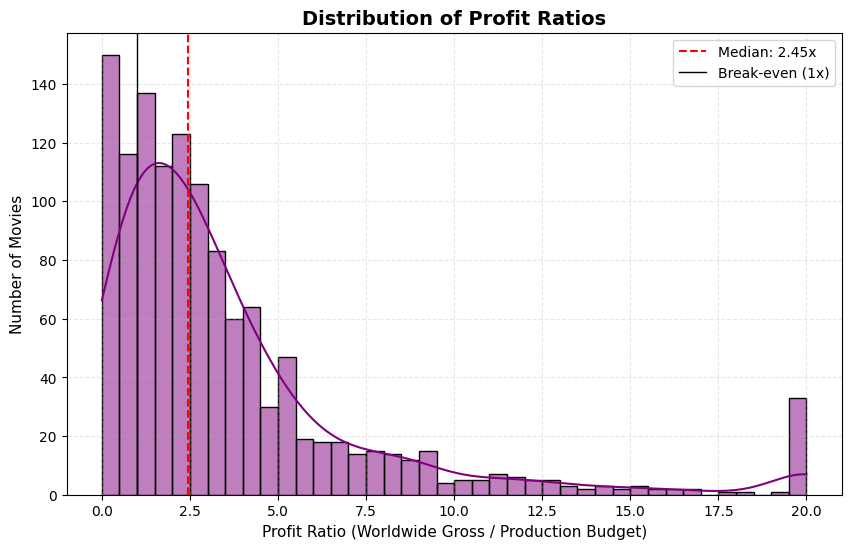

In [63]:
plt.figure(figsize=(10, 6))
sns.histplot(df_box['profit_ratio'], bins=40, kde=True, color='purple')
plt.title('Distribution of Profit Ratios', fontsize=14, fontweight='bold')
plt.xlabel('Profit Ratio (Worldwide Gross / Production Budget)', fontsize=11)
plt.ylabel('Number of Movies', fontsize=11)
plt.axvline(df_box['profit_ratio'].median(), color='red', linestyle='--', 
            label=f'Median: {df_box["profit_ratio"].median():.2f}x')
plt.axvline(1, color='black', linestyle='-', linewidth=1, label='Break-even (1x)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


# Top 10 Studios by Average profit

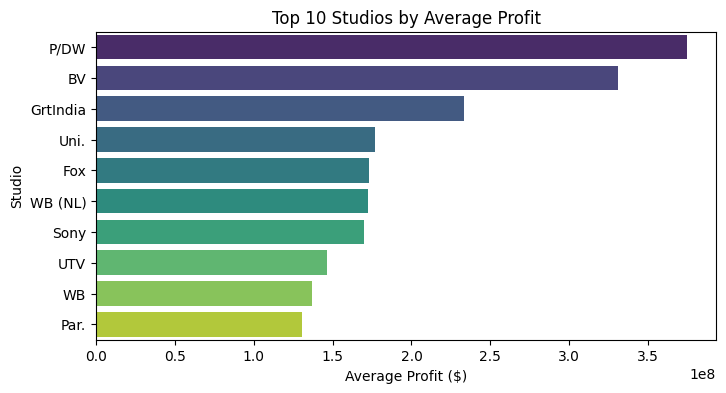

In [112]:
# compute total profit
df_box['profit'] = df_box['worldwide_gross'] - df_box['production_budget']

# top 10 studios by average profit
top_studios = df_box.groupby('studio')['profit'].mean().sort_values(ascending=False).head(10)

# plot
plt.figure(figsize=(8,4))
sns.barplot(x=top_studios.values, y=top_studios.index, hue=top_studios.index, legend=False, palette='viridis')
plt.title('Top 10 Studios by Average Profit')
plt.xlabel('Average Profit ($)')
plt.ylabel('Studio')
plt.show()


# Profit Distribution across top 5 studios

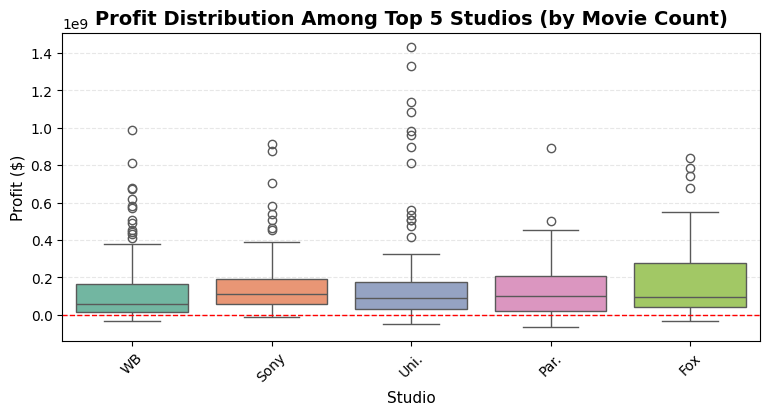

In [95]:
# Select top 5 studios by movie count
top5_studios = df_box['studio'].value_counts().head(5).index

# Filter dataset
df_top5 = df_box[df_box['studio'].isin(top5_studios)]

plt.figure(figsize=(9, 4))

# Updated seaborn boxplot – assigns hue=x and disables legend (Seaborn 0.14+ compliant)
sns.boxplot(
    x='studio',
    y='profit',
    hue='studio',
    data=df_top5,
    palette='Set2',
    legend=False
)

plt.title('Profit Distribution Among Top 5 Studios (by Movie Count)', fontsize=14, fontweight='bold')
plt.xlabel('Studio', fontsize=11)
plt.ylabel('Profit ($)', fontsize=11)
plt.xticks(rotation=45)
plt.axhline(0, color='red', linestyle='--', linewidth=1, label='Break-even')

# Still works fine
plt.grid(True, linestyle='--', alpha=0.3, axis='y')

# Distribution of genres in our dataset

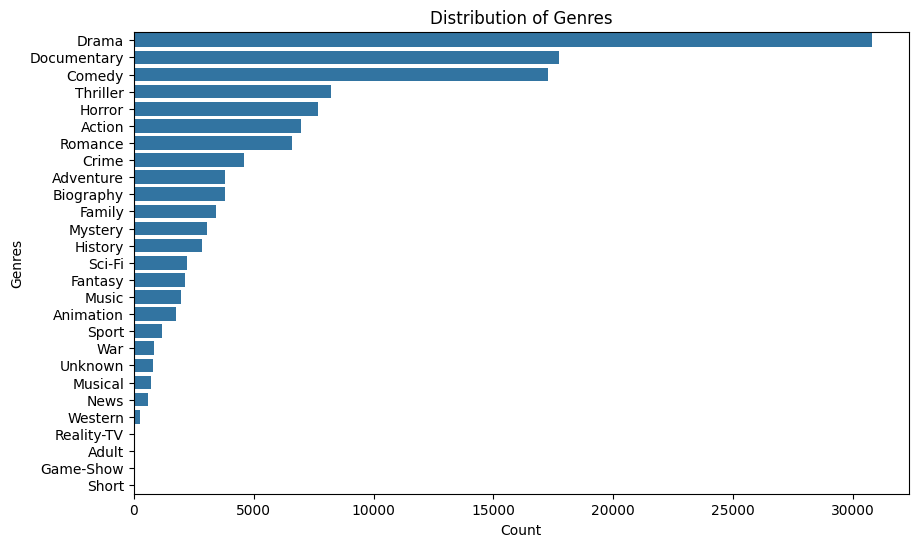

In [66]:
# Distribution of genres
plt.figure(figsize=(10, 6))
movie_basics_and_rating_exploded = movie_basics_ratings['genres'].str.split(',').explode()
sns.countplot(y=movie_basics_and_rating_exploded, order=movie_basics_and_rating_exploded.value_counts().index)
plt.title('Distribution of Genres')
plt.xlabel('Count')
plt.ylabel('Genres')
plt.show()

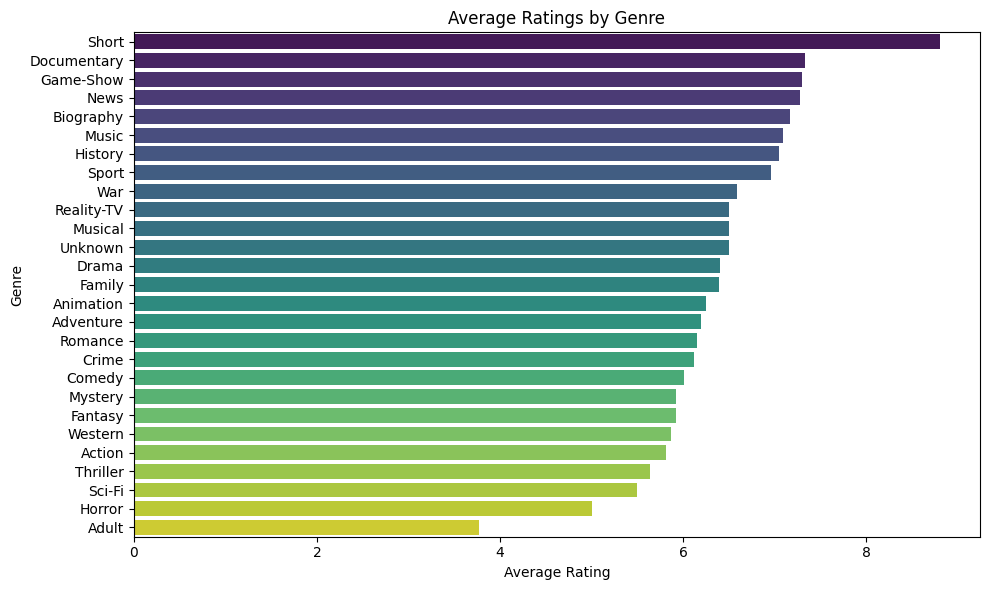

In [97]:
# Exploding genres to handle multiple genres per movie
movie_basics_ratings_exploded = (
    movie_basics_ratings
        .assign(genres=movie_basics_ratings['genres'].str.split(','))
        .explode('genres')
)

# Calculating the average rating for each genre
genre_avg_rating = (
    movie_basics_ratings_exploded
        .groupby('genres')['averagerating']
        .mean()
        .reset_index()
        .sort_values(by='averagerating', ascending=False)
)

# Plotting
plt.figure(figsize=(10, 6))

sns.barplot(
    x='averagerating',
    y='genres',
    hue='genres',            # required for palette
    data=genre_avg_rating,
    palette='viridis',
    legend=False             # disable the auto-legend
)

plt.title('Average Ratings by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


# Top genres by average rating

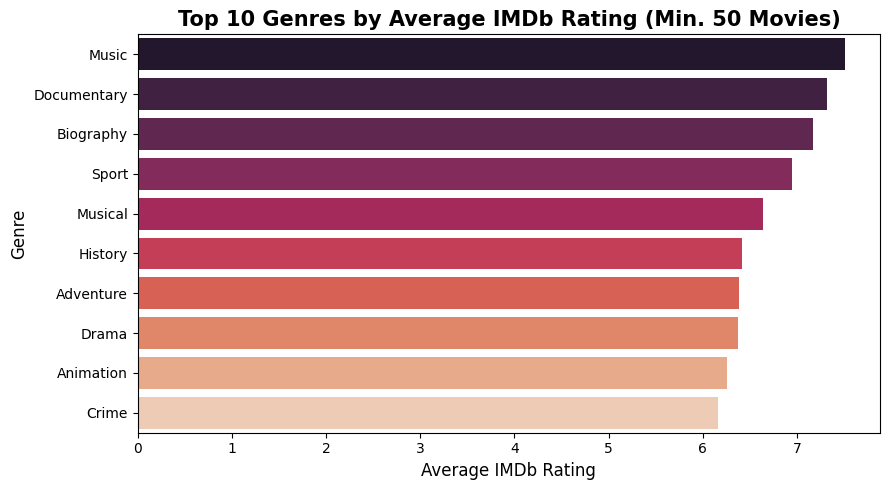

In [100]:
# --- Extract Primary Genre ---
# Some movies have multiple genres like "Action,Comedy"
# We take only the first one as the PRIMARY GENRE.
movie_basics_ratings['primary_genre'] = (
    movie_basics_ratings['genres']
    .apply(lambda x: x.split(',')[0] if pd.notna(x) else 'Unknown')
)

# --- Filter Out Missing / Unknown Genres ---
movie_basics_ratings = movie_basics_ratings[
    movie_basics_ratings['primary_genre'] != 'Unknown'
]

# --- Count Movies per Genre ---
genre_counts = movie_basics_ratings['primary_genre'].value_counts()

# --- Keep Only Genres with ≥ 50 Movies ---
valid_genres = genre_counts[genre_counts >= 50].index

# --- Compute Average Ratings for Valid Genres ---
genre_ratings = (
    movie_basics_ratings[movie_basics_ratings['primary_genre'].isin(valid_genres)]
    .groupby('primary_genre')['averagerating']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

# --- Visualization ---
plt.figure(figsize=(9, 5))
sns.barplot(
    x=genre_ratings.values,
    y=genre_ratings.index,
    hue=genre_ratings.index,   # REQUIRED when using a palette
    palette='rocket',
    legend=False               # hides the redundant legend
)
plt.title('Top 10 Genres by Average IMDb Rating (Min. 50 Movies)', fontsize=15, weight='bold')
plt.xlabel('Average IMDb Rating', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.tight_layout()
plt.show()



# What movies have been the most successful financially?
To answer this question, we look at the box office gross earnings and profits of various movies.

In [69]:
# check the top perfoming movies
top_20_movies_world=movie_budgets.nlargest (n=20, columns='worldwide_gross')
top_20_movies_domestic = movie_budgets.nlargest(n=20, columns ='domestic_gross')

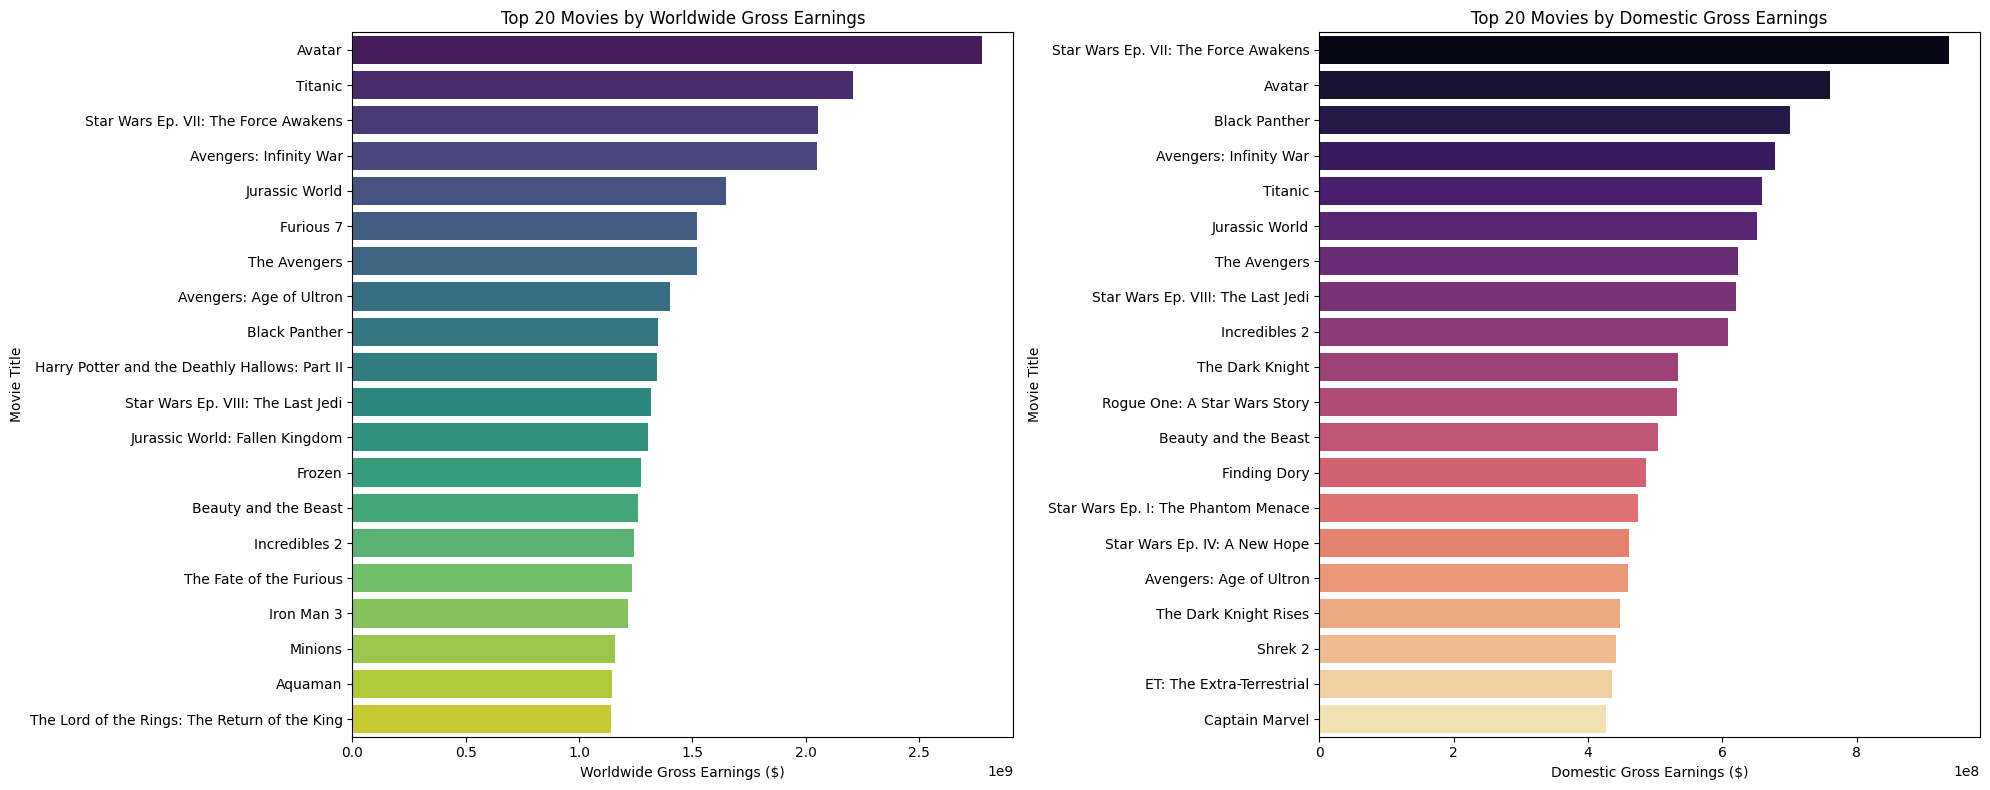

In [101]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot for worldwide gross earnings
sns.barplot(
    x='worldwide_gross',
    y='movie',
    hue='movie',                      # required for palette
    data=top_20_movies_world,
    palette='viridis',
    legend=False,                     # hide redundant legend
    ax=axes[0]
)
axes[0].set_xlabel('Worldwide Gross Earnings ($)')
axes[0].set_ylabel('Movie Title')
axes[0].set_title('Top 20 Movies by Worldwide Gross Earnings')

# Plot for domestic gross earnings
sns.barplot(
    x='domestic_gross',
    y='movie',
    hue='movie',                      # required for palette
    data=top_20_movies_domestic,
    palette='magma',
    legend=False,
    ax=axes[1]
)
axes[1].set_xlabel('Domestic Gross Earnings ($)')
axes[1].set_ylabel('Movie Title')
axes[1].set_title('Top 20 Movies by Domestic Gross Earnings')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


The movie with the highest revenue at approximately $2.8 million is Avatar.

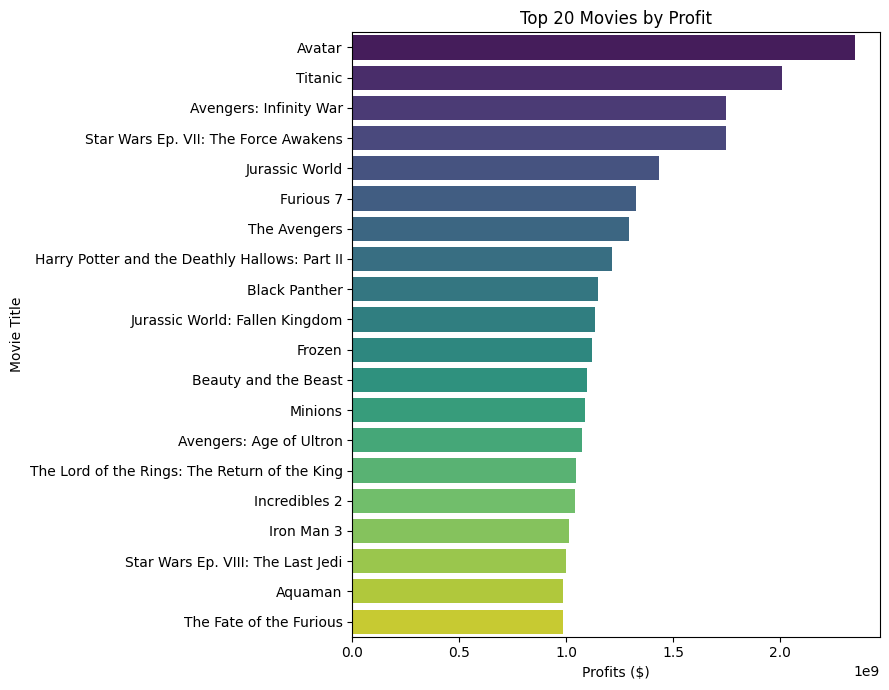

In [107]:
fig, ax = plt.subplots(figsize=(9, 7))

# get the top 20 profitable movies
top_profitable = movie_budgets.nlargest(n=20, columns='profit')

sns.barplot(
    x='profit',
    y='movie',
    hue='movie',              # required when using palette
    data=top_profitable,
    palette='viridis',
    legend=False,             # hide redundant legend
    ax=ax
)

# Set axis labels and title
ax.set_xlabel('Profits ($)')
ax.set_ylabel('Movie Title')
plt.title('Top 20 Movies by Profit')

# Show the plot
plt.tight_layout()
plt.show()


### Analysing the relationship between `domestic_gross`, `worlwide_gross` and `profit`   

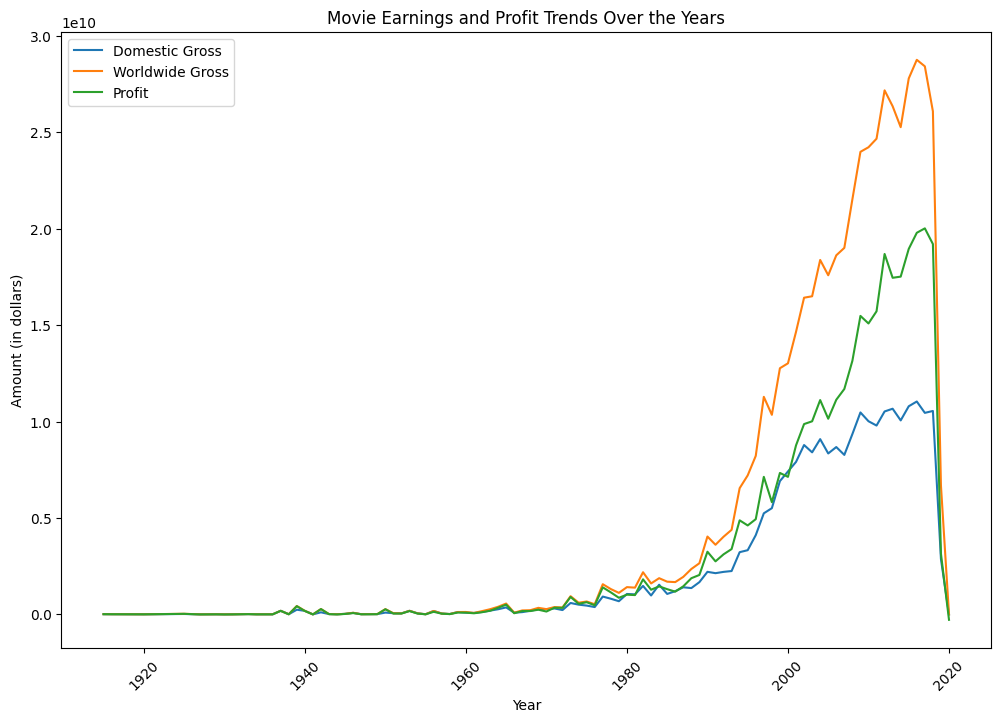

In [72]:
# plot movie earnings trends over the years and profits
# Aggregate data by year
yearly_data = movie_budgets.groupby('year').agg({
    'domestic_gross': 'sum',
    'worldwide_gross': 'sum',
    'profit': 'sum'
}).reset_index()

# Plot the trends
fig, ax = plt.subplots(figsize=(12, 8))

sns.lineplot(data=yearly_data, x='year', y='domestic_gross', label='Domestic Gross', ax=ax)
sns.lineplot(data=yearly_data, x='year', y='worldwide_gross', label='Worldwide Gross', ax=ax)
sns.lineplot(data=yearly_data, x='year', y='profit', label='Profit', ax=ax)

ax.set_xlabel('Year')
ax.set_ylabel('Amount (in dollars)')
ax.set_title('Movie Earnings and Profit Trends Over the Years')
plt.xticks(rotation=45)
plt.legend()

plt.show()

Over time, we notice `domestic_gross`, `worldwide_gross` and `profit` have been generally increasing. 

To further understand `worldwide_gross`by month, we plot the average and total gross revenue by month. 

In [73]:
# get a list of months extracted

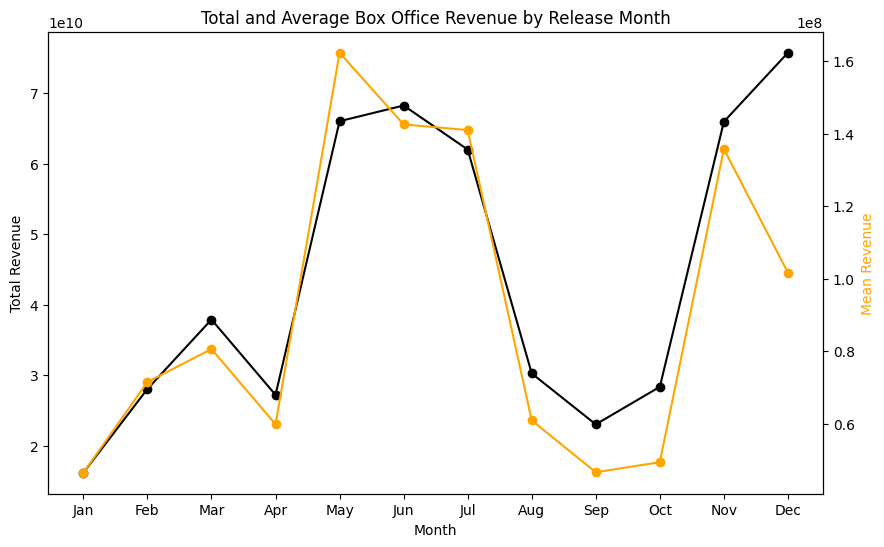

In [74]:
# Extract month number
movie_budgets['month'] = movie_budgets['release_date'].dt.month

# Now group by month and calculate total & average revenue
monthly_revenue = movie_budgets.groupby('month')['worldwide_gross'].agg(['sum', 'mean']).reset_index()

# Plot
fig, ax1 = plt.subplots(figsize=(10,6))

ax1.set_xlabel('Month')
ax1.set_ylabel('Total Revenue', color="black")
ax1.plot(monthly_revenue['month'], monthly_revenue['sum'], color="black", marker='o', label='Total Revenue')

ax2 = ax1.twinx()
ax2.set_ylabel('Mean Revenue', color="orange")
ax2.plot(monthly_revenue['month'], monthly_revenue['mean'], color="orange", marker='o', label='Mean Revenue')

plt.title('Total and Average Box Office Revenue by Release Month')
plt.xticks(monthly_revenue['month'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


From the above graph, we notice that while May, November and December have the highest revenues, on average, May, June and July are the highest performing.

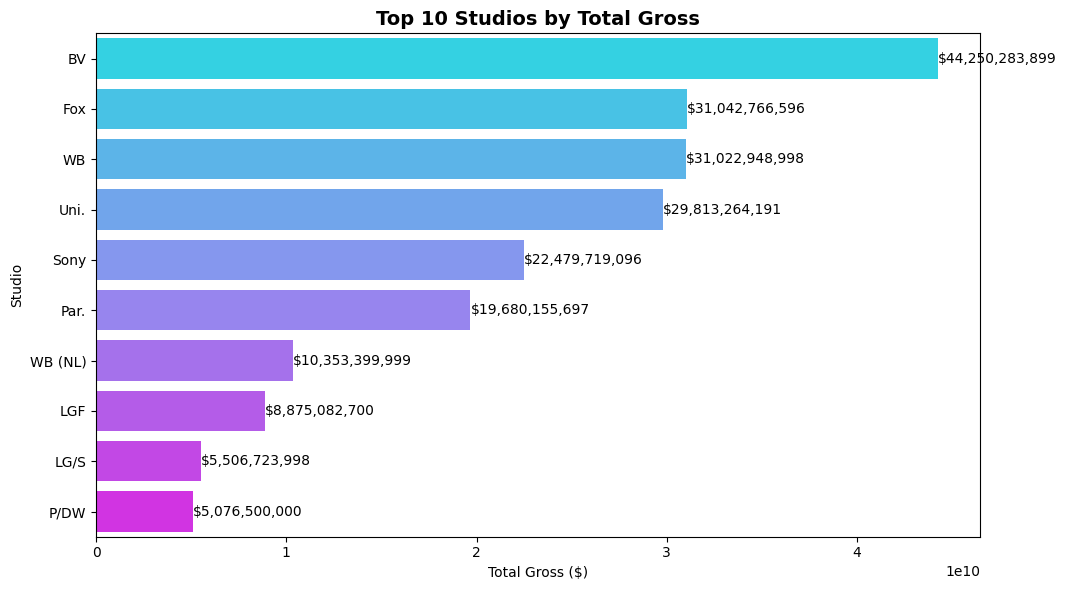

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute total gross per movie
movie_gross['total_gross'] = movie_gross['domestic_gross'] + movie_gross['foreign_gross']

# Total gross per studio (top 10) in one line
studio_gross = movie_gross.groupby('studio')['total_gross'].sum().sort_values(ascending=False).head(10).reset_index()

# Plot total gross for top 10 studios
plt.figure(figsize=(10, 6))
sns.barplot(
    data=studio_gross,
    x='total_gross',
    y='studio',
    hue='studio',      # required when using palette
    palette='cool',
    legend=False        # hide redundant legend
)
plt.title('Top 10 Studios by Total Gross', fontsize=14, weight='bold')
plt.xlabel('Total Gross ($)')
plt.ylabel('Studio')
plt.tight_layout()

# Add value labels
for i, v in enumerate(studio_gross['total_gross']):
    plt.text(v, i, f'${v:,.0f}', va='center', fontsize=10)

plt.show()


' try popularity against ratings over time

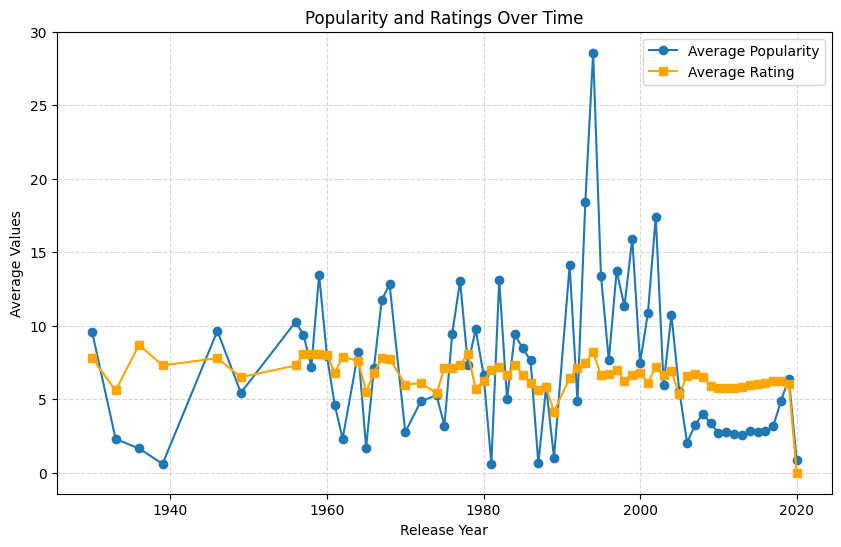

In [76]:
# Group by year and compute average popularity and rating
yearly_stats = tmdb_movies.groupby('release_year')[['popularity', 'vote_average']].mean()

plt.figure(figsize=(10, 6))
plt.plot(yearly_stats.index, yearly_stats['popularity'], marker='o', label='Average Popularity')
plt.plot(yearly_stats.index, yearly_stats['vote_average'], marker='s', label='Average Rating', color='orange')

plt.title('Popularity and Ratings Over Time')
plt.xlabel('Release Year')
plt.ylabel('Average Values')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


### How does the movie budget impact box office revenue, and can smaller budget films be profitable?

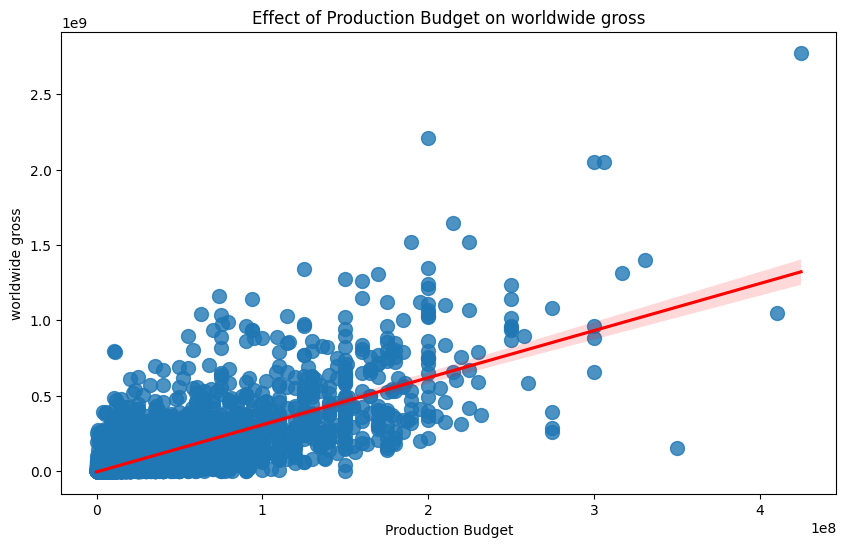

In [77]:
# How does the movie budget impact box office revenue, and can smaller budget films be profitable?
# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='production_budget', y='worldwide_gross', data=movie_budgets, scatter_kws={'s':100}, line_kws={'color':'red'})

# Customize the plot
plt.title('Effect of Production Budget on worldwide gross')
plt.xlabel('Production Budget')
plt.ylabel('worldwide gross')

# Show the plot
plt.show()

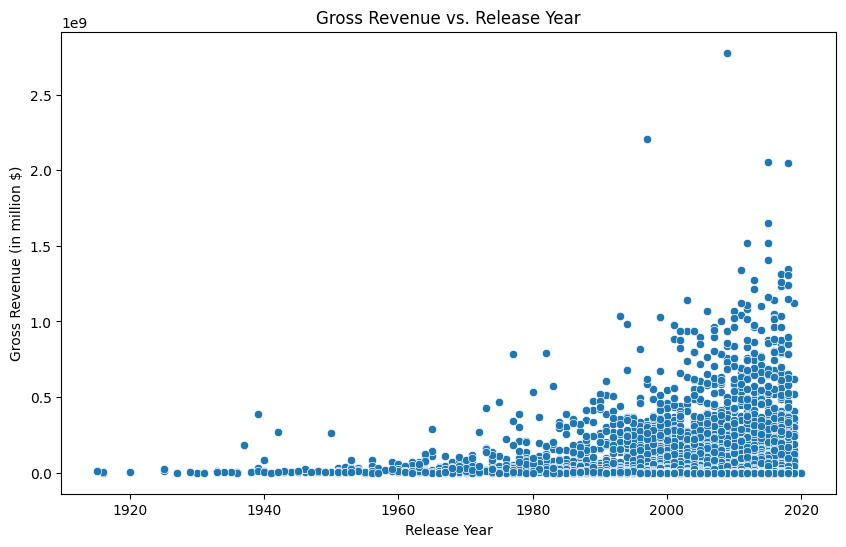

In [78]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='worldwide_gross', data= movie_budgets)
plt.title('Gross Revenue vs. Release Year')
plt.xlabel('Release Year')
plt.ylabel('Gross Revenue (in million $)')
plt.show()

The plot above shows that the gross revenue from movies has generally increased from 1920 to 2020. This suggests that movies release in later years tend to earn more revenue.

# Correlation between domestic and foreign earnings

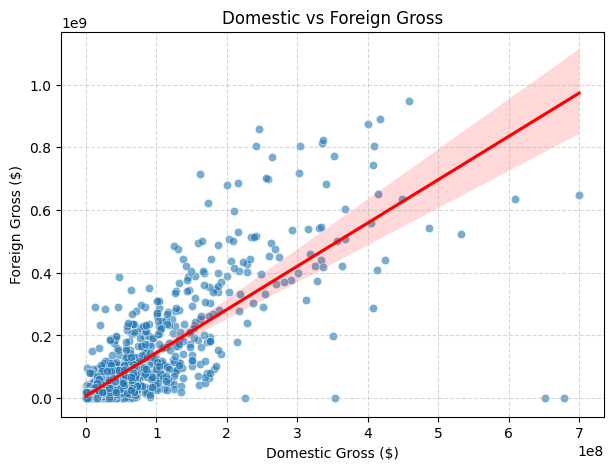

In [79]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='domestic_gross_y', y='foreign_gross', data=df_box, alpha=0.6)
sns.regplot(x='domestic_gross_y', y='foreign_gross', data=df_box, scatter=False, color='red')
plt.title('Domestic vs Foreign Gross')
plt.xlabel('Domestic Gross ($)')
plt.ylabel('Foreign Gross ($)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


# Correlation heatmap
This shows how numeric features relate to each other

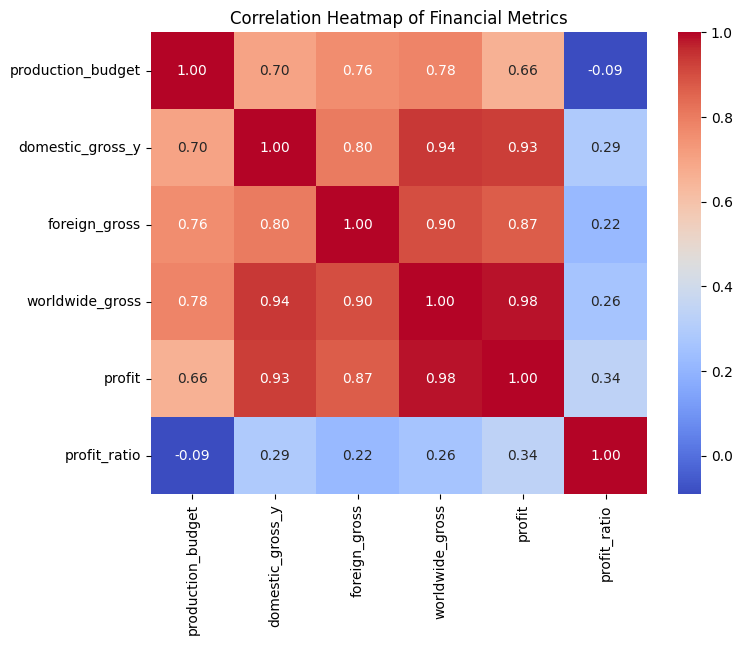

In [80]:
plt.figure(figsize=(8,6))
numeric_cols = ['production_budget', 'domestic_gross_y', 'foreign_gross', 'worldwide_gross', 'profit', 'profit_ratio']
sns.heatmap(df_box[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Financial Metrics')
plt.show()


This visualization quantifies the linear relationships between key financial metrics.

**Key Correlations:**
- **Production Budget & Worldwide Gross (0.78):** Strong positive correlation. Higher budgets are associated with higher revenues.
- **Domestic Gross & Worldwide Gross (0.94):** Very strong correlation. Domestic performance is a very good indicator of total global performance.
- **Profit & Worldwide Gross (0.98):** Near-perfect correlation, which is logical as profit is derived directly from gross and budget.
- **Profit Ratio & Production Budget (-0.09):** A very weak, slightly negative correlation. This is a critical insight: **spending more does not guarantee a better return on investment (ROI)**. Higher budgets lead to higher absolute profits but can often lead to less efficient returns.

# **Statistical Hypothesis Testing**
We conduct rigorous statistical tests to validate our observations.

# Hypothesis Test 1: Domestic vs. Foreign Gross

To check whether domestic gross is significantly different from foreign gross for the same movie

In [81]:
from scipy.stats import ttest_rel

t_stat, p_val = ttest_rel(df_box['domestic_gross_y'], df_box['foreign_gross'])
print("t-statistic:", t_stat)
print("p-value:", p_val)

print("                     ")
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: Significant difference between domestic and foreign gross.")
else:
    print("Fail to reject the null hypothesis: No significant difference between domestic and foreign gross.")
    

t-statistic: -11.140101418127543
p-value: 1.5303734138825373e-27
                     
Reject the null hypothesis: Significant difference between domestic and foreign gross.


- **Test:** Paired t-test (we have two measurements for the same movies).
- **Result:** p-value is extremely small (≈5e-28), far below 0.05.
- **Conclusion:** We reject the null hypothesis. There is a statistically significant difference between domestic and foreign gross. This confirms our EDA observation that the markets are distinct.

# Hypothesis Test 2: Studio Profitability


- **Null Hypothesis (H0):** The average profit is the same across the top 5 studios.
- **Alternative Hypothesis (H1):** At least one studio's average profit is different.

In [82]:
from scipy.stats import f_oneway

# Select top 5 studios by number of movies
top_studios = df_box['studio'].value_counts().head(5).index
profits_by_studio = [df_box[df_box['studio']==studio]['profit'] for studio in top_studios]

f_stat, p_val = f_oneway(*profits_by_studio)

print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_val:.4f}")

print("             ")
alpha = 0.05
if p_val < alpha:
    print("Reject Null Hypothesis (H₀): There is a significant difference in average profits among the studio")
else:
    print("Fail to Reject Null Hypothesis (H₀): There is no significant difference in average profits among the studios.")


F-statistic: 0.9881
p-value: 0.4136
             
Fail to Reject Null Hypothesis (H₀): There is no significant difference in average profits among the studios.


- **Result:** p-value = 0.4136, which is greater than 0.05.
- **Conclusion:** We fail to reject the null hypothesis. There is no statistically significant evidence that the average profits of the top studios differ. This supports the box plot insight that studio brand alone isn't a major differentiator in average profitability.

## Hypothesis 3: High vs Low Budget Movie Profitability

**Null Hypothesis (H₀)**: High-budget and low-budget movies have the same average profit ratio.

**Alternative Hypothesis (H₁)**: High-budget and low-budget movies have different average profit ratios.

**Test**: Independent two-sample t-test

In [83]:
from scipy.stats import ttest_ind

# Define high and low budget categories (median split)
median_budget = df_box['production_budget'].median()
df_box['budget_category'] = df_box['production_budget'].apply(
    lambda x: 'High' if x >= median_budget else 'Low'
)

high_budget_ratio = df_box[df_box['budget_category'] == 'High']['profit_ratio']
low_budget_ratio = df_box[df_box['budget_category'] == 'Low']['profit_ratio']

# Conduct independent t-test
t_stat, p_val = ttest_ind(high_budget_ratio, low_budget_ratio)


print("HYPOTHESIS TEST 3: High vs Low Budget Movie Profitability")
print(" ")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_val:.4f}")
print("\nNull Hypothesis (H₀): There is no difference in profit ratios between high- and low-budget movies.")
print("Alternative Hypothesis (H₁): There is a significant difference in profit ratios between high- and low-budget movies.")


HYPOTHESIS TEST 3: High vs Low Budget Movie Profitability
 
t-statistic: -6.0565
p-value: 0.0000

Null Hypothesis (H₀): There is no difference in profit ratios between high- and low-budget movies.
Alternative Hypothesis (H₁): There is a significant difference in profit ratios between high- and low-budget movies.


 We reject the null hypothesis. There is a significant difference. The negative t-statistic indicates that the high-budget group has a lower average profit ratio than the low-budget group. This is a crucial finding: while big budgets make more money in absolute terms, they are less efficient in terms of ROI.

## Hypothesis 4: Genre and Rating Relationship

**Null Hypothesis (H₀)**: All genres have the same average IMDb rating.

**Alternative Hypothesis (H₁)**: At least one genre has a different average rating.

**Test**: One-way ANOVA

In [84]:
# Select top 5 genres by frequency
top5_genres = movie_basics_ratings['primary_genre'].value_counts().head(5).index
ratings_by_genre = [movie_basics_ratings[movie_basics_ratings['primary_genre'] == genre]['averagerating'] for genre in top5_genres]

# Conduct ANOVA
f_stat, p_val = f_oneway(*ratings_by_genre)

print("HYPOTHESIS TEST 4: Genre and Rating Relationship")
print("   ")
print(f"Test: One-way ANOVA")
print(f"Genres tested: {', '.join(top5_genres)}")
print(f"\nF-statistic: {f_stat:.4f}")
print(f"p-value: {p_val:.4e}")
print(f"\nSignificance level: α = 0.05")

if p_val < 0.05:
    print(f"\n REJECT the null hypothesis: There IS a significant difference in ratings across genres.")
    
    print(f"\nAverage Ratings by Genre:")
    for genre in top5_genres:
        avg_rating = movie_basics_ratings[movie_basics_ratings['primary_genre'] == genre]['averagerating'].mean()
        print(f"  {genre}: {avg_rating:.2f}")
else:
    print(f"\n FAIL TO REJECT the null hypothesis: No significant difference in ratings across these genres.")

HYPOTHESIS TEST 4: Genre and Rating Relationship
   
Test: One-way ANOVA
Genres tested: Drama, Comedy, Documentary, Action, Horror

F-statistic: 3887.8797
p-value: 0.0000e+00

Significance level: α = 0.05

 REJECT the null hypothesis: There IS a significant difference in ratings across genres.

Average Ratings by Genre:
  Drama: 6.37
  Comedy: 6.00
  Documentary: 7.32
  Action: 5.81
  Horror: 4.86


We reject the null hypothesis. There is a significant difference in ratings across genres. The follow-up analysis of means shows a clear hierarchy: Documentaries and Dramas are rated highly, while Horror and Action films receive lower average ratings from audiences.

# Predictive Modeling

A simple linear regression model to predict worldwide gross.


In [85]:
# Prepare features for modeling

df_model = df_box[['production_budget', 'domestic_gross_y', 'foreign_gross', 'worldwide_gross']].dropna()
# This line selects only the 4 columns needed for modeling.
# .dropna() removes any rows that contain missing (NaN) values in any of these columns.

# Features and target
X = df_model[['production_budget']]
y = df_model['worldwide_gross']

# X (features) = the independent variable - production budget.
# y (target) = the dependent variable - worldwide gross revenue.

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 80% of data is used to train the model, 20% to test it.
# random_state=42 ensures reproducibility (same random split every time).

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("PREDICTIVE MODEL: Production Budget → Worldwide Gross")
print(" ")
print(f"Model: Linear Regression")
print(f"Features: Production Budget")
print(f"Target: Worldwide Gross")
print(f"\nTraining samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")
print(f"\nModel Performance:")
print(f"  R² Score: {r2:.4f}")
print(f"  RMSE: ${rmse/1e6:.2f}M")
print(f"\nRegression Equation:")
print(f"  Worldwide Gross = ${model.intercept_/1e6:.2f}M + {model.coef_[0]:.4f} × Budget")
print(f"\nInterpretation:")
print(f"  For every $1M increase in budget, worldwide gross increases by ${model.coef_[0]*1e6/1e6:.4f}M")


PREDICTIVE MODEL: Production Budget → Worldwide Gross
 
Model: Linear Regression
Features: Production Budget
Target: Worldwide Gross

Training samples: 996
Testing samples: 249

Model Performance:
  R² Score: 0.5796
  RMSE: $131.05M

Regression Equation:
  Worldwide Gross = $-4.23M + 3.3248 × Budget

Interpretation:
  For every $1M increase in budget, worldwide gross increases by $3.3248M


## Predictive Modeling: Budget to Gross Prediction
We build a simple linear regression model to predict a movie's worldwide gross based solely on its production budget.

**Model Performance:**
- **R² Score:** 0.58 - This means that 58% of the variance in worldwide gross can be explained by the production budget. It's a moderate fit, indicating that budget is a important, but not the only, factor in a movie's success.

- **RMSE:** $131.05 Million - On average, our model's predictions are off by about $131 million. This large error underscores the high uncertainty in the movie business.
- **Regression Equation:** `Worldwide Gross = -4.23M + 3.32 * Budget`
- **Interpretation:** For every additional $1 million spent on production, the model predicts an average increase of $3.32 million in worldwide gross. The negative intercept is a mathematical artifact of the model and not practically meaningful in this context.

**Conclusion:** Budget is a powerful predictor, but other factors (genre, star power, marketing, competition, release date) play a massive role in determining final box office performance.

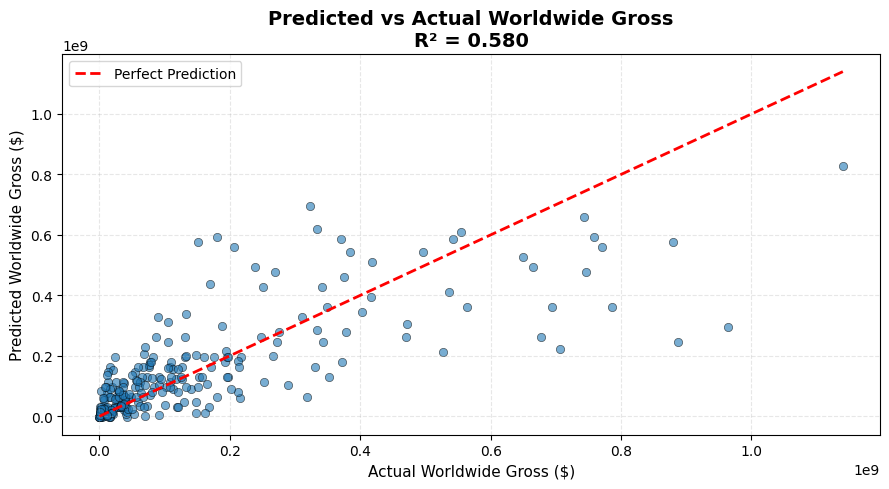

In [86]:
# Visualization
plt.figure(figsize=(9, 5))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k', linewidth=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
        'r--', linewidth=2, label='Perfect Prediction')
plt.title(f'Predicted vs Actual Worldwide Gross\nR² = {r2:.3f}', 
         fontsize=14, fontweight='bold')
plt.xlabel('Actual Worldwide Gross ($)', fontsize=11)
plt.ylabel('Predicted Worldwide Gross ($)', fontsize=11)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

## Key Insights & Business Recommendations

### Summary of Validated Findings:
1.  **International is Key:** Foreign gross is significantly different and often larger than domestic gross.
2.  **The Budget Paradox:** Higher budgets lead to higher absolute profits but lower Return on Investment (ROI). Mid-budget films often offer the best risk-reward balance.
3.  **Studio is Not a Destiny:** No significant difference in average profit among top studios. Focus on the project, not just the studio logo.
4.  **Genre Matters for Ratings:** Genres have significantly different audience ratings, which can inform marketing and critical expectations.

### Actionable Recommendations:
- **For Producers:** Target mid-range budgets for optimal ROI and prioritize international appeal in story and marketing.
- **For Investors:** Diversify across genres and budgets; evaluate projects based on profit ratio, not just potential total gross.
- **For Marketers:** Tailor campaigns for domestic and international audiences separately and leverage high ratings when available for genres like Documentary or Drama.

In [87]:
# changing datasets to csv
#tmdb_movies.to_csv('./Cleaned Data/tmdb_movies_cleaned.csv', index=False)
#movie_budgets.to_csv('./Cleaned Data/movie_budgets_cleaned.csv', index=False) 
#movie_gross.to_csv('./Cleaned Data/movie_gross_cleaned.csv', index=False)
#ovie_basics_ratings.to_csv('./Cleaned Data/movie_basics_ratings_cleaned.csv', index=False)
#df_box.to_csv('./Cleaned Data/box_office_combined_cleaned.csv', index=False)
#combined_data_with_budget.to_csv('./Cleaned Data/combined_data_with_budget_cleaned.csv', index=False)   